In [179]:
import numpy as np
import pandas as pd

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
import warnings
warnings.filterwarnings('ignore')

In [183]:
df=pd.read_csv(r'/Users/nishantsaurabh/Desktop/Dataset/LendingClub/loan.csv')

In [184]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [186]:
#Checking for null values
100*df.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [187]:
df1=df.drop(df.columns[(100*df.isnull().mean())>50], axis=1)#dropping columns with more than 50% null values

In [188]:
from pathlib import Path 
filepath = Path(r'//Users/nishantsaurabh/Desktop/Dataset/LendingClub/loan_new.csv')
df1.to_csv(filepath) 

In [189]:
#checking null values again 
100*df1.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [190]:
#deleting below columns as all the values are 0
df2=df1.drop(['chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

In [191]:
from pathlib import Path 
filepath = Path(r'/Users/nishantsaurabh/Desktop/Dataset/LendingClub/loan_new1.csv')
df2.to_csv(filepath) 

In [192]:
df2=df2.drop(['collections_12_mths_ex_med','application_type','acc_now_delinq','initial_list_status','policy_code'],axis=1)

In [193]:
from pathlib import Path 
filepath = Path(r'/Users/nishantsaurabh/Desktop/Dataset/LendingClub/loan_new2.csv')
df2.to_csv(filepath) 

In [194]:
#pymnt_plan zip_code	addr_state	
df2=df2.drop(['pymnt_plan','zip_code','addr_state'],axis=1)

In [195]:
from pathlib import Path 
filepath = Path(r'/Users/nishantsaurabh/Desktop/Dataset/LendingClub/loan_new3.csv')
df2.to_csv(filepath) 

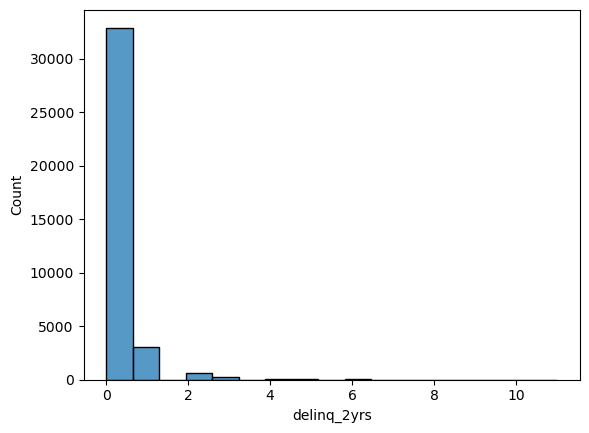

In [217]:

sns.histplot(df2['delinq_2yrs'])

plt.show()

In [197]:
df2.shape

(39717, 43)

In [198]:
#drop Current loan status from the rows becuase it will not provide any past data 
loan_status_list = ['Fully Paid','Charged Off']
df2=df2[df2['loan_status'].isin(loan_status_list)]
df2.head()
from pathlib import Path 
filepath = Path(r'/Users/nishantsaurabh/Desktop/Dataset/LendingClub/loan_new5.csv')
df2.to_csv(filepath) 

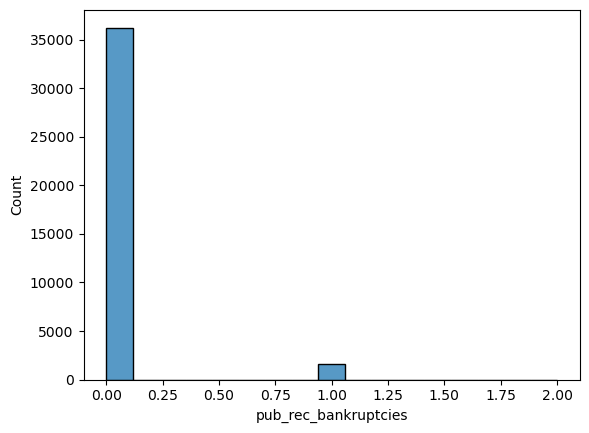

In [199]:
sns.histplot(df2['pub_rec_bankruptcies'])
plt.show()
#anything other than 0 should be rejected
df2 = df2.drop(df2[df2['pub_rec_bankruptcies'] > 0].index)
from pathlib import Path 
filepath = Path(r'/Users/nishantsaurabh/Desktop/Dataset/LendingClub/loan_new5.csv')
df2.to_csv(filepath) 

In [200]:
df2.shape


(36935, 43)

In [201]:
print(df2.dtypes)

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util          

In [202]:
# Fix data type before so that we can update missing values
df['emp_length'] = df['emp_length'].str.extract('(\d+)')
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)
# Convert 'last_pymnt_d' to datetime format
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%d') 


In [203]:
# Update missing values
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())
most_common_date = df['last_pymnt_d'].value_counts().idxmax()
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(most_common_date)

boxplot in id


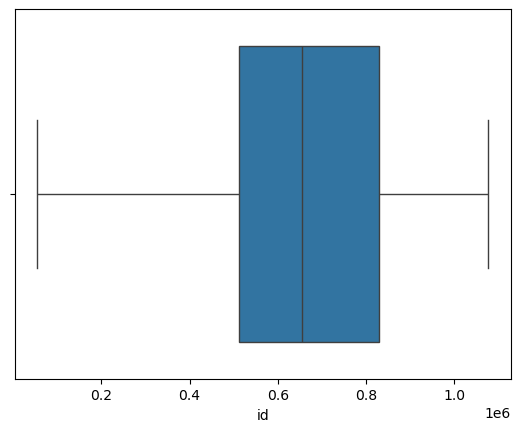

boxplot in member_id


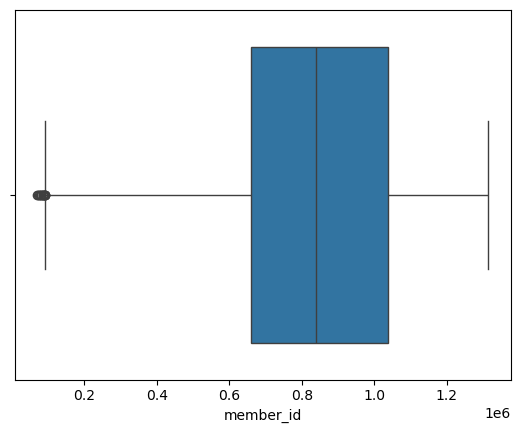

boxplot in loan_amnt


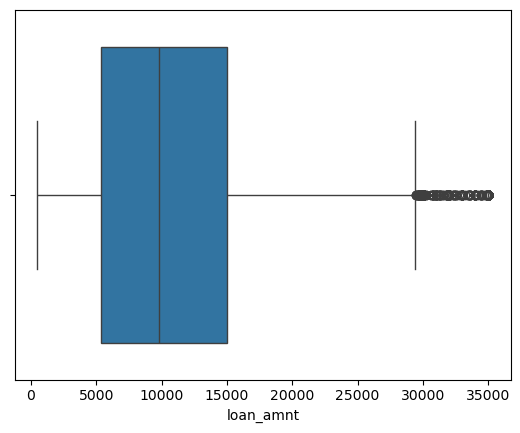

boxplot in funded_amnt


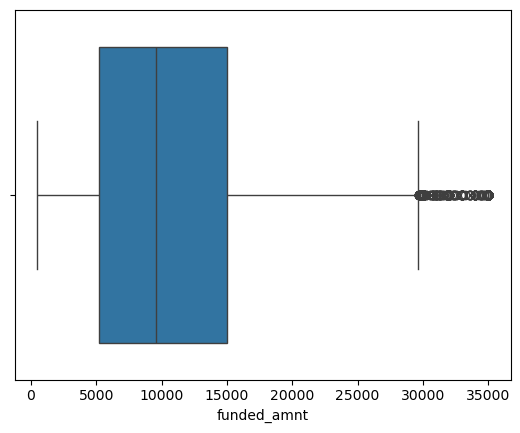

boxplot in funded_amnt_inv


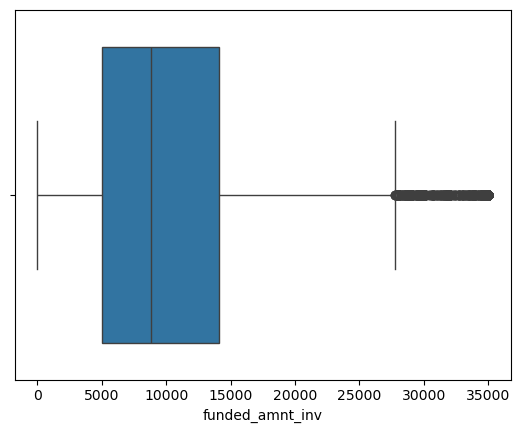

boxplot in term


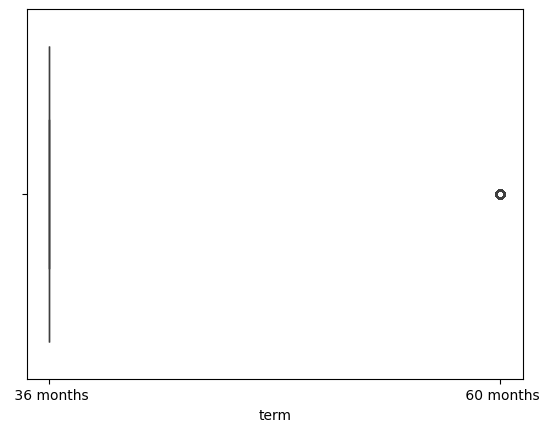

boxplot in int_rate


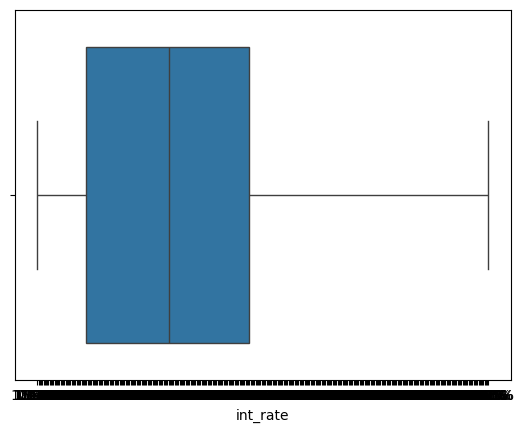

boxplot in installment


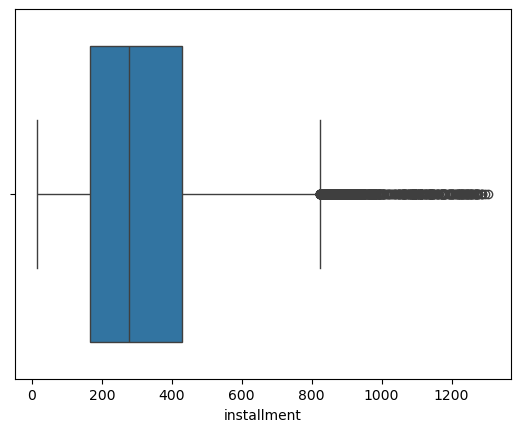

boxplot in grade


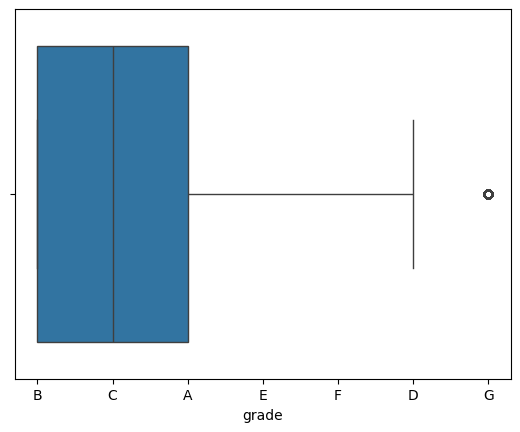

boxplot in sub_grade


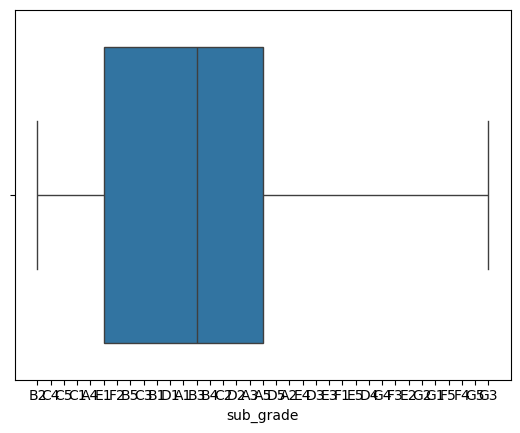

boxplot in emp_title


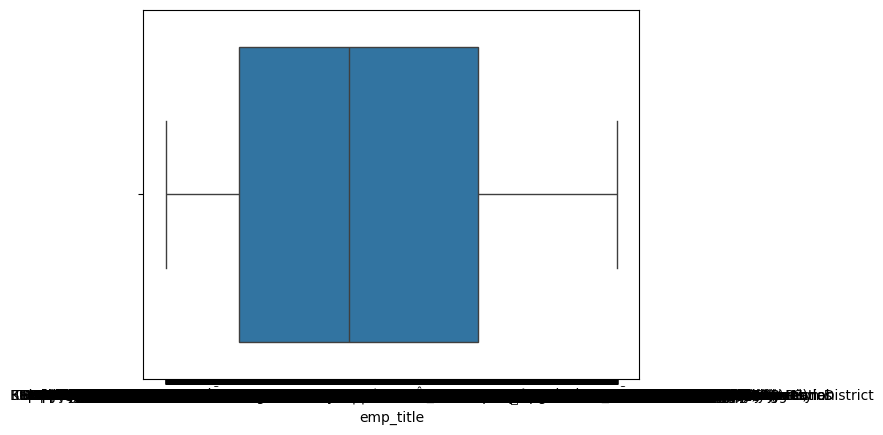

boxplot in emp_length


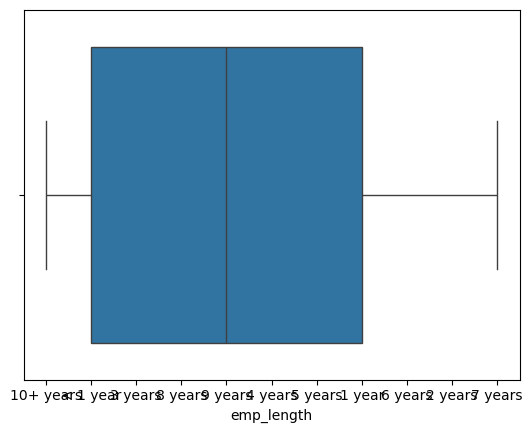

boxplot in home_ownership


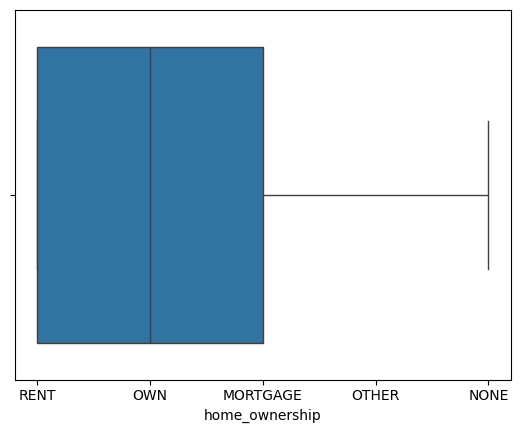

boxplot in annual_inc


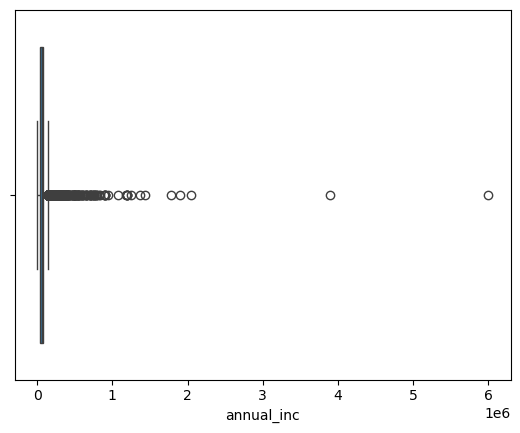

boxplot in verification_status


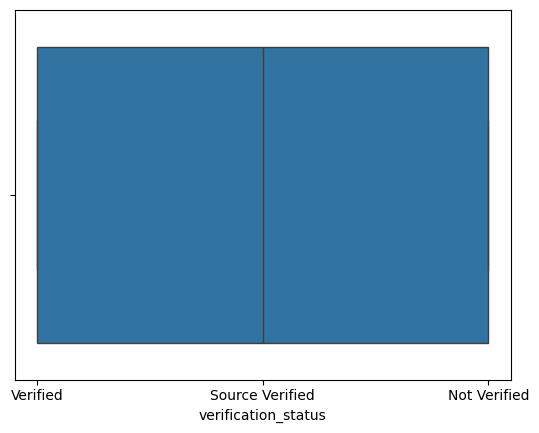

boxplot in issue_d


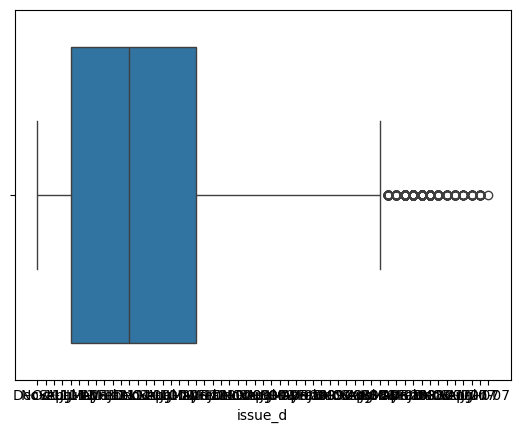

boxplot in loan_status


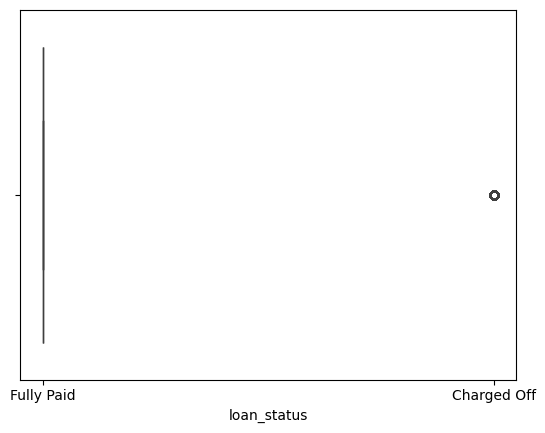

boxplot in url


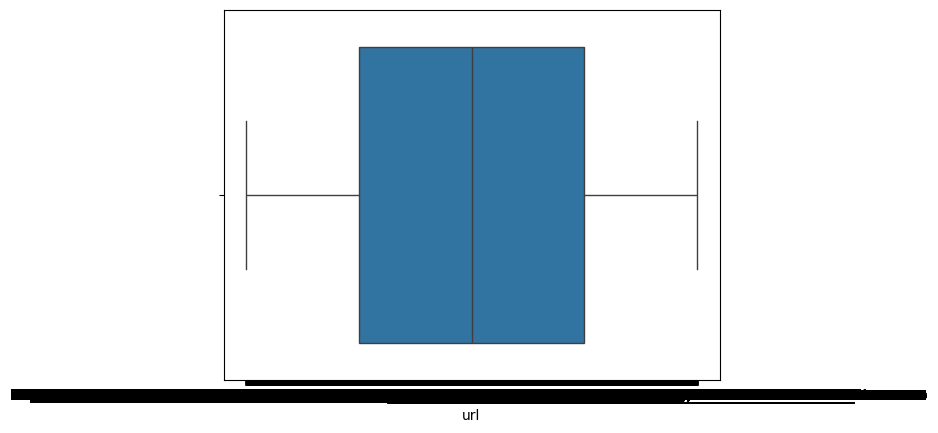

boxplot in desc


ValueError: 
  Borrower added on 12/12/11 > I will be using this loan to pay off two credit cards. A Visa card that has a balance of $15.5K and an interest rate at 20.3%. The other is a retail credit card with a balance of $2.5K and at 24.4% interest. When these cards are paid off they will be cancelled. The loan will also lower my monthly payments for these debts. I am an excellent borrower and have had a loan with Lending Club for one year and been on time for all 12 payments. I have never been late on a payment of any kind in my life. I have a stable job in state government and have been in the position for over 6 years. I should be considered a very low risk borrower. <br>
                                                                                                                        ^
ParseException: Expected end of text, found '$'  (at char 120), (line:1, col:121)

<Figure size 640x480 with 1 Axes>

boxplot in purpose


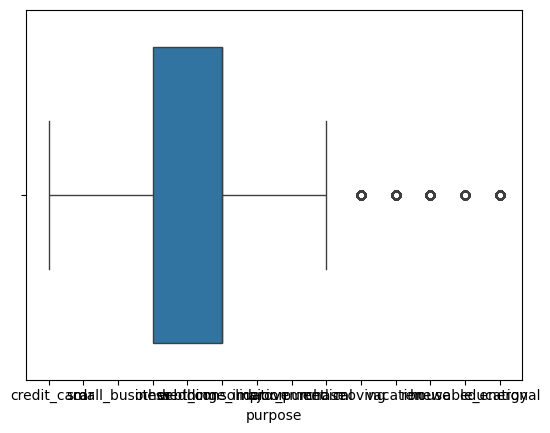

boxplot in title


ValueError: 
$$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 640x480 with 1 Axes>

boxplot in dti


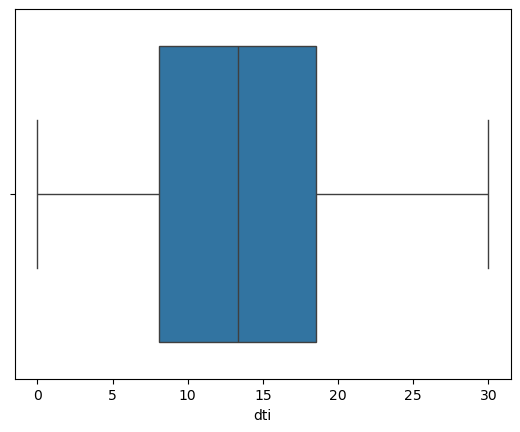

boxplot in delinq_2yrs


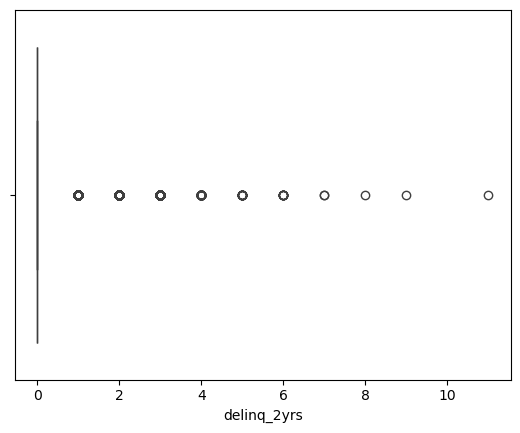

boxplot in earliest_cr_line


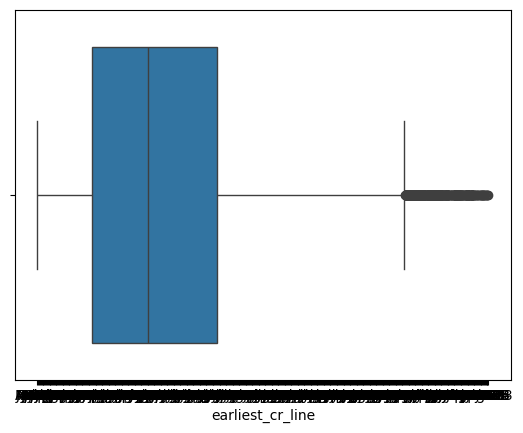

boxplot in inq_last_6mths


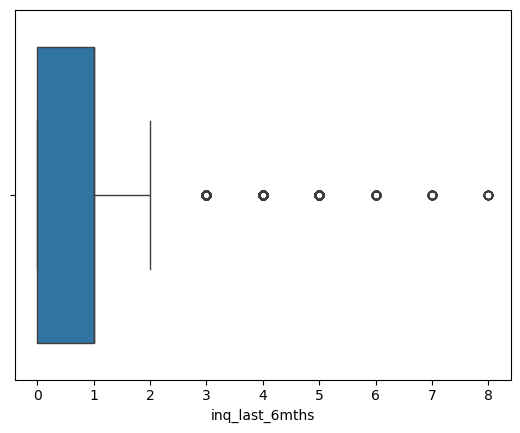

boxplot in open_acc


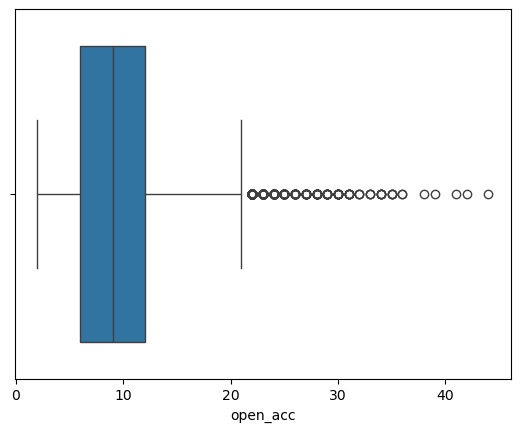

boxplot in pub_rec


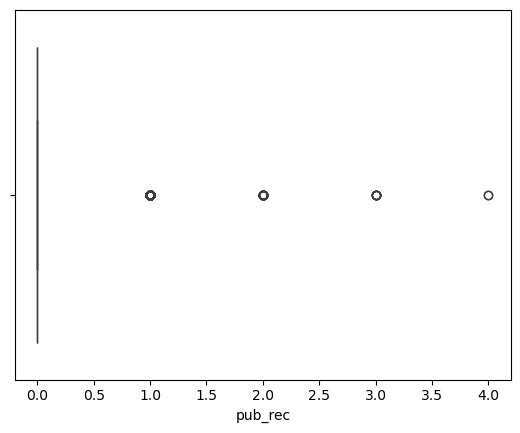

boxplot in revol_bal


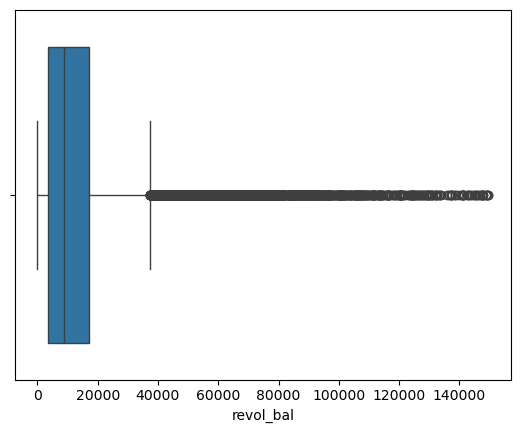

boxplot in revol_util


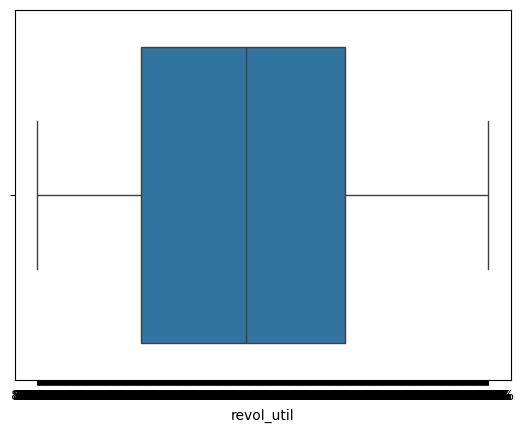

boxplot in total_acc


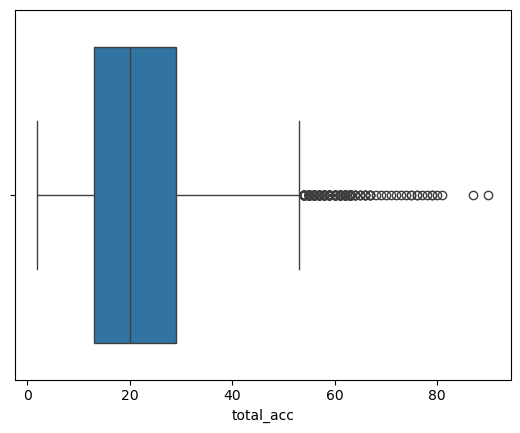

boxplot in out_prncp


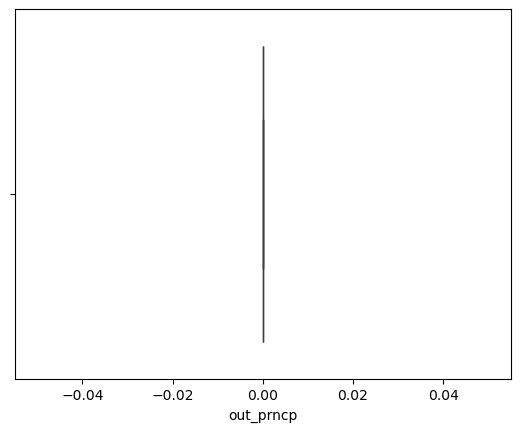

boxplot in out_prncp_inv


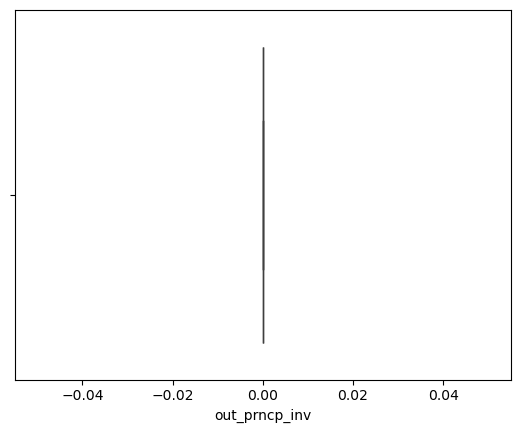

boxplot in total_pymnt


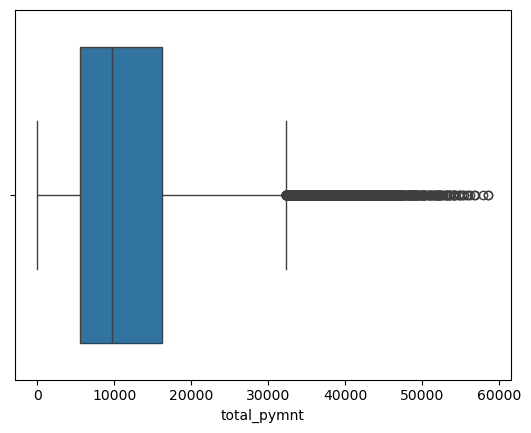

boxplot in total_pymnt_inv


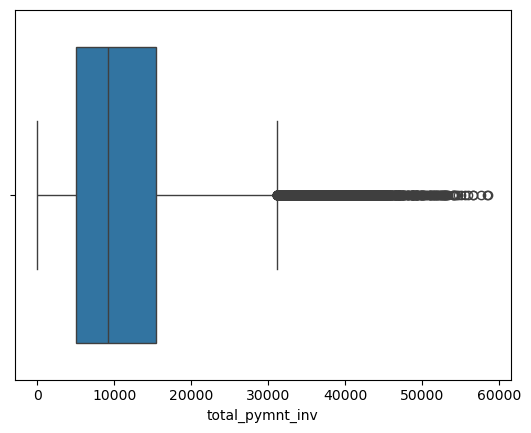

boxplot in total_rec_prncp


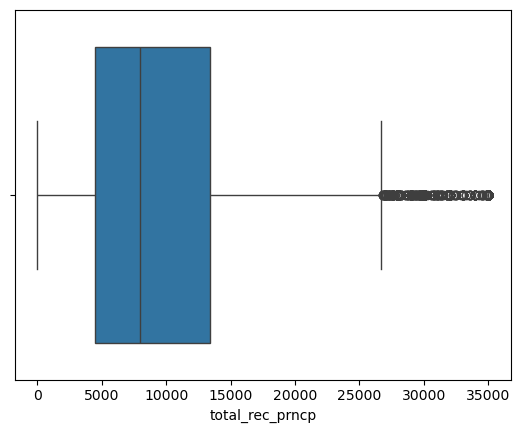

boxplot in total_rec_int


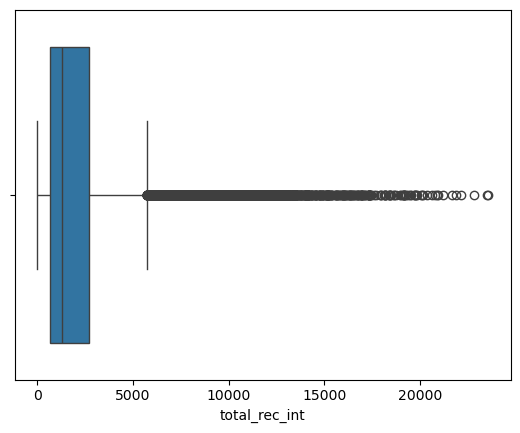

boxplot in total_rec_late_fee


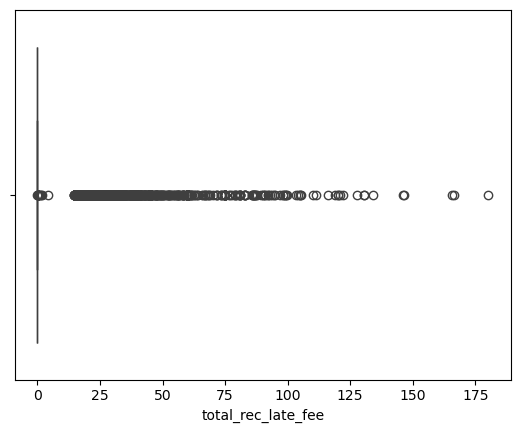

boxplot in recoveries


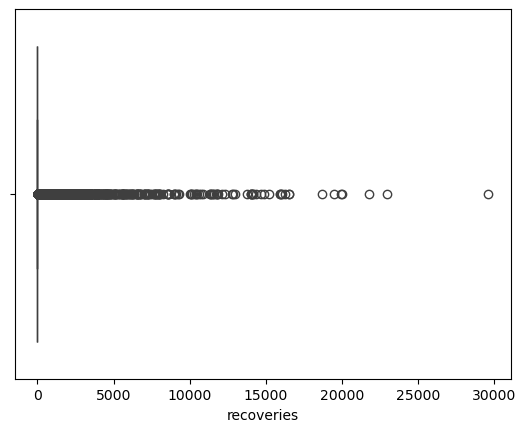

boxplot in collection_recovery_fee


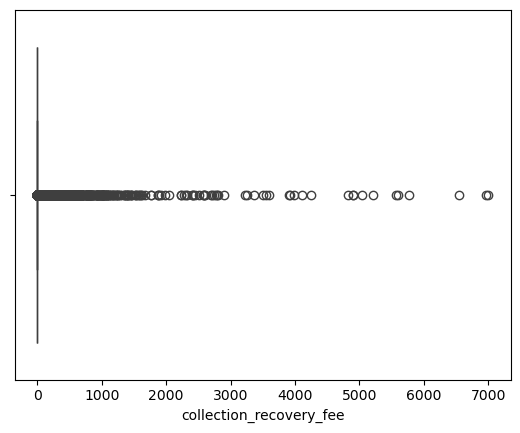

boxplot in last_pymnt_d


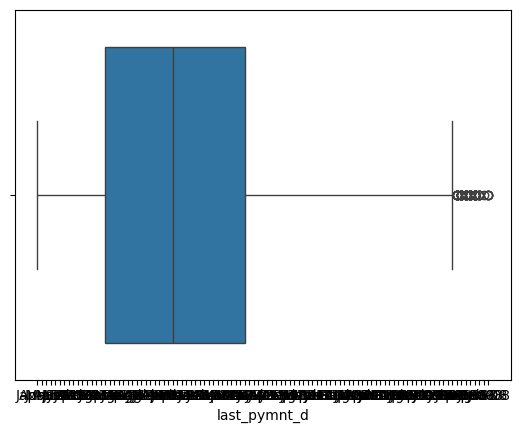

boxplot in last_pymnt_amnt


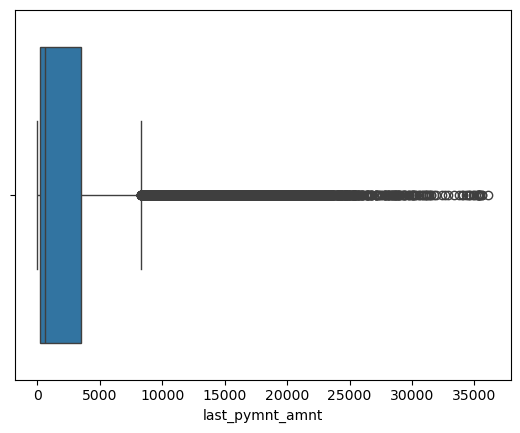

boxplot in last_credit_pull_d


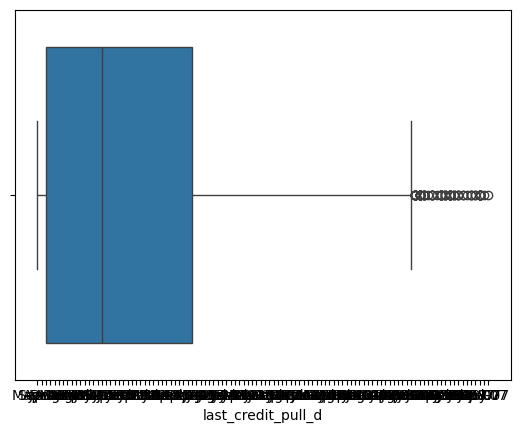

boxplot in pub_rec_bankruptcies


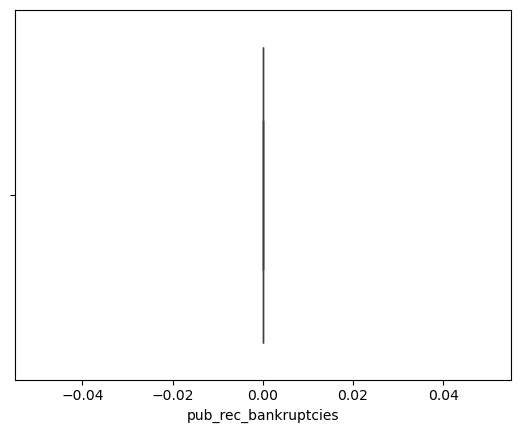

In [204]:
#check for outliers
for i in df2:
  print('boxplot in',i)
  sns.boxplot(x=df2[i])
  plt.show() 

In [205]:
((df2['loan_amnt']>df2['loan_amnt'].quantile(.99))|(df2['loan_amnt']<df2['loan_amnt'].quantile(.01))).sum() # outliers for loan amount

299

In [206]:
percentile_threshold=df2['loan_amnt'].quantile(0.99)
df2['loan_amnt']=df2['loan_amnt'][df2['loan_amnt']<=percentile_threshold]
print(df2.shape)

(36935, 43)


In [207]:
df2.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


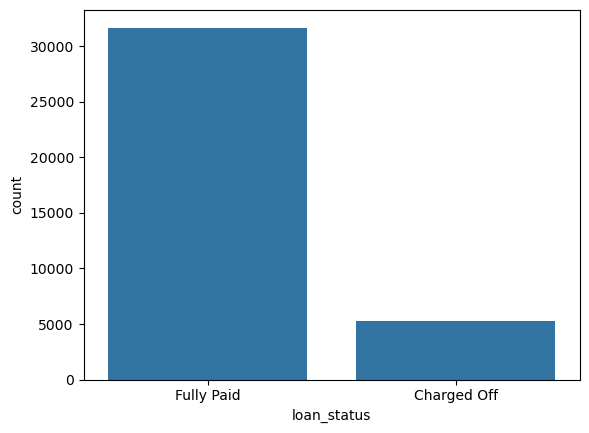

In [208]:
sns.countplot(x = df2['loan_status'])
plt.show()

<Axes: xlabel='count', ylabel='purpose'>

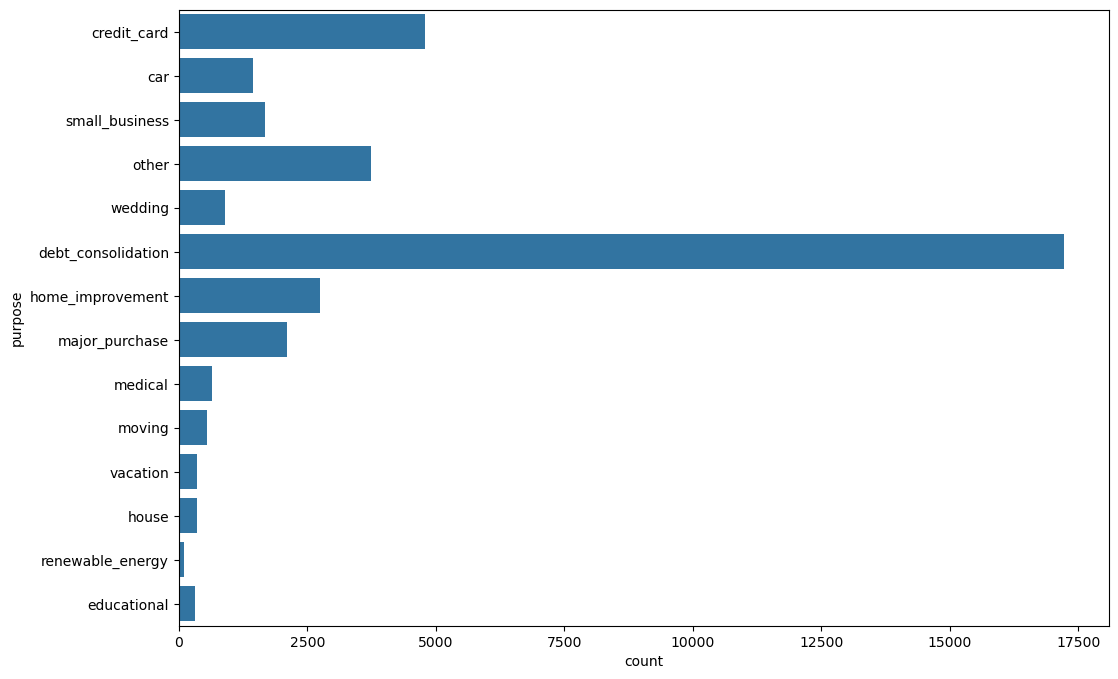

In [209]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y =df2['purpose'], data=df2[df2.loan_status == 'Charged Off'])
# The most of the loans chraged off were taken for the purpose of debt_consolidation

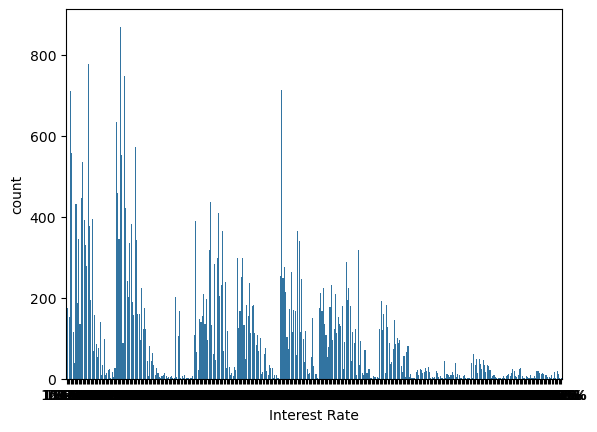

In [210]:
sns.countplot(x=df2['int_rate'], data=df2[df2.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.show()

In [211]:
df2.int_rate = pd.to_numeric(df2.int_rate.apply(lambda x : x.split('%')[0]))
int_rate_range=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%']
df2['int_rate_range'] = pd.cut(df2['int_rate'],bins=5, labels=int_rate_range)
df2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_range
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,9%-13%
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,13%-17%
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,13%-17%
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,13%-17%
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,5%-9%


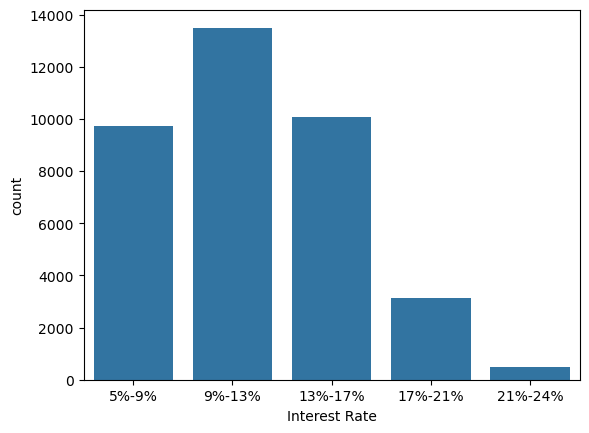

In [212]:
sns.countplot(x=df2['int_rate_range'], data=df2[df2.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.show()
#Most of the loans defaulted were with interest rate in the range 9-13

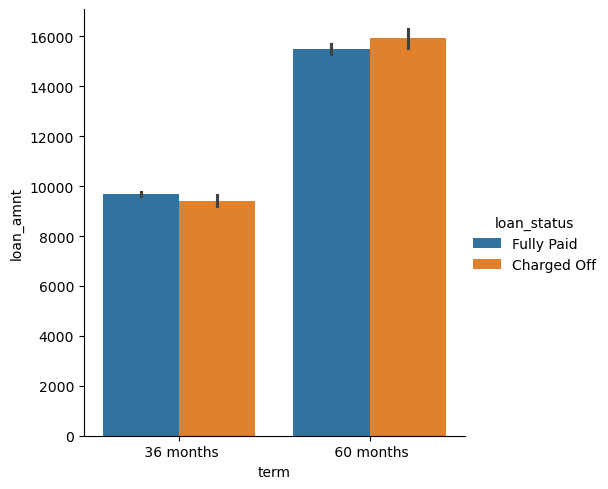

In [213]:
sns.catplot(x =df2['term'], y = df2['loan_amnt'], data = df2,hue = 'loan_status', kind = 'bar')
#Applicants who have applied for larger loan amounts have taken long term loans

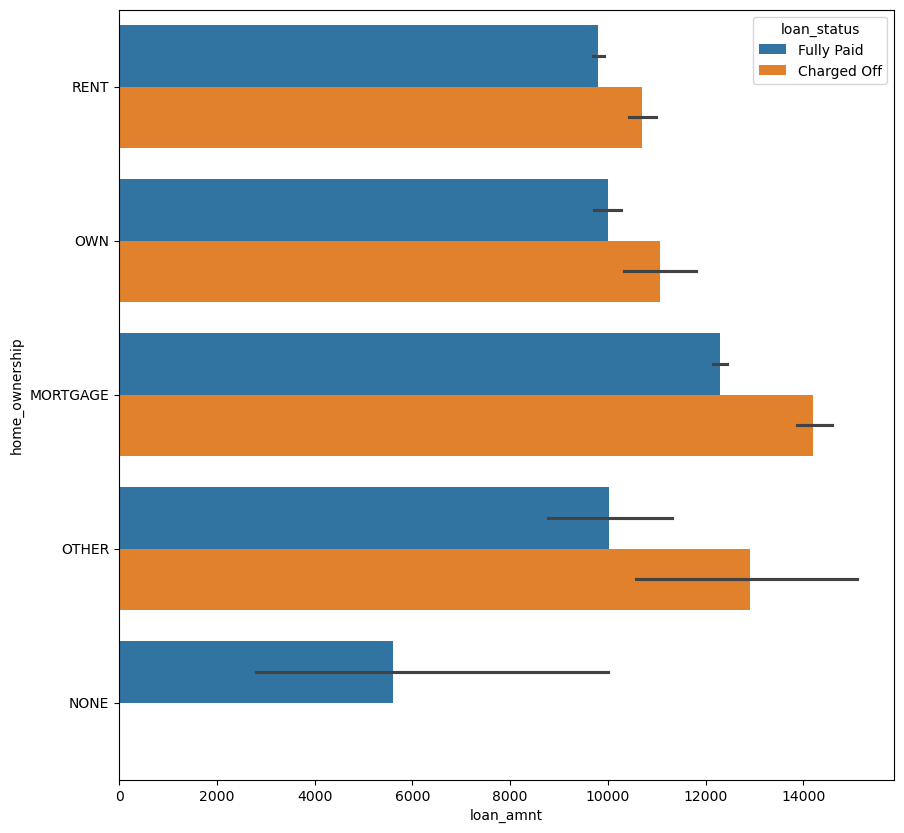

In [214]:
plt.figure(figsize=(10,10))
sns.barplot(data =df2,x=df2['loan_amnt'], y=df2['home_ownership'], hue ='loan_status')
plt.show()
#charged off is more in case of mortgage

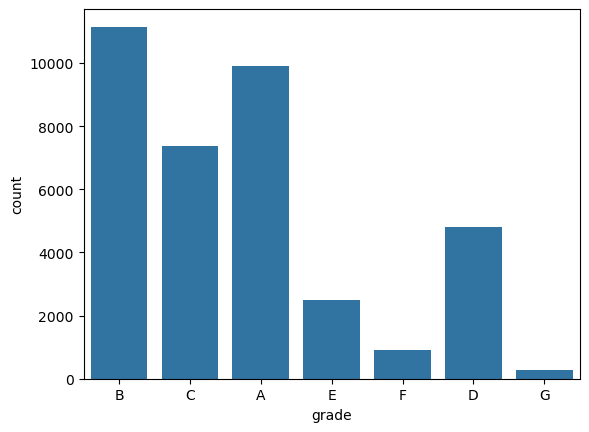

In [215]:
sns.countplot(x=df2['grade'], data=df2[df2.loan_status == 'Charged Off'])
plt.show()
#Charged off is maximum for grade B

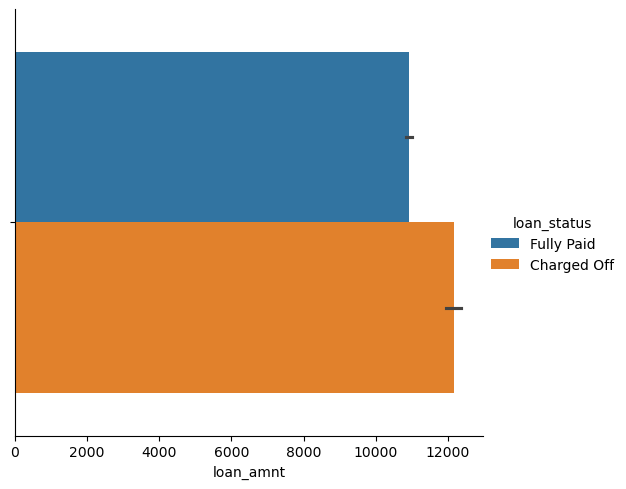

In [216]:
sns.catplot(x = df2['loan_amnt'], data = df2,hue = 'loan_status', kind = 'bar')
#The more the loan amount the more are the changes of default

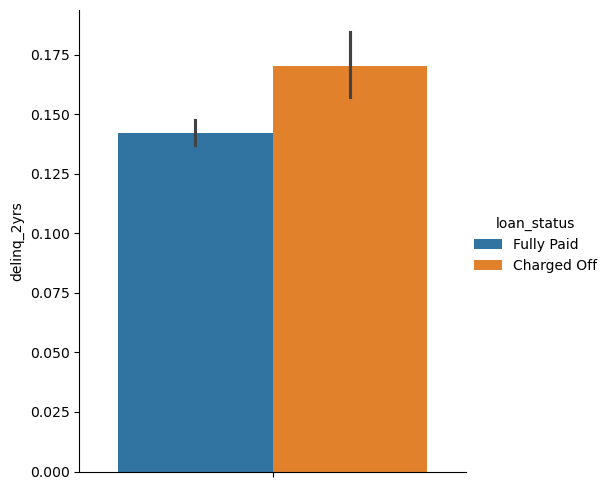

In [219]:

sns.catplot(y = df2['delinq_2yrs'], data = df2,hue = 'loan_status', kind = 'bar')

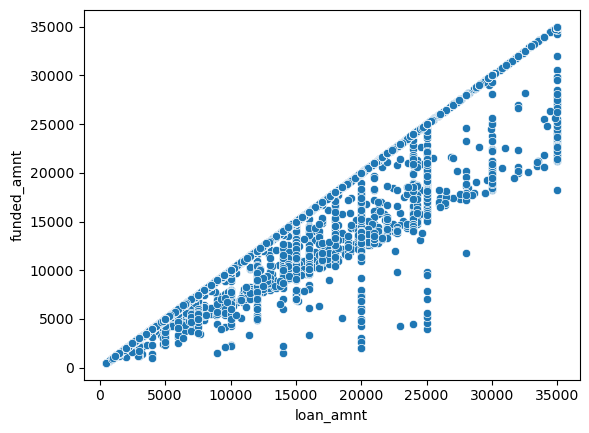

In [223]:
sns.scatterplot(x=df2['loan_amnt'],y=df2['funded_amnt'])
plt.show()

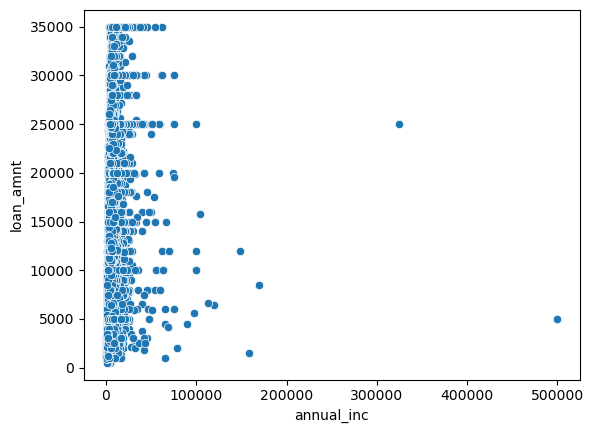

In [228]:
sns.scatterplot(x=df2['annual_inc']/12,y=df2['loan_amnt'])
plt.show()

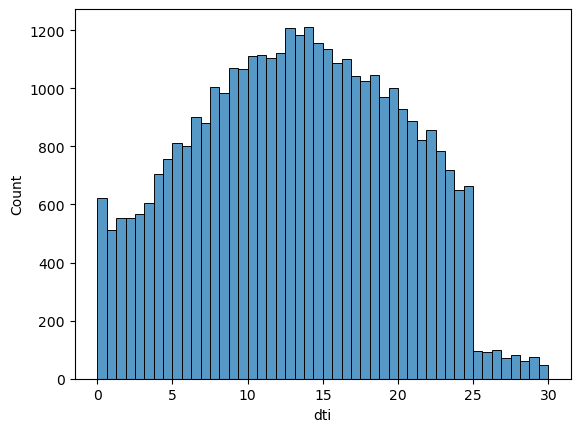

In [229]:

sns.histplot(x=df2['dti'])
plt.show()

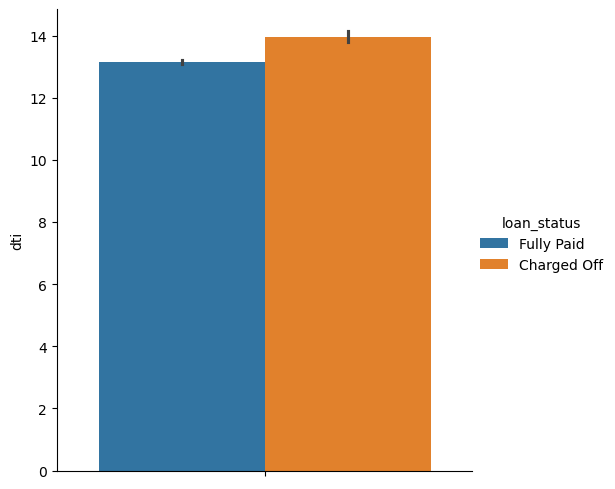

In [230]:
sns.catplot(y = df2['dti'], data = df2,hue = 'loan_status', kind = 'bar')

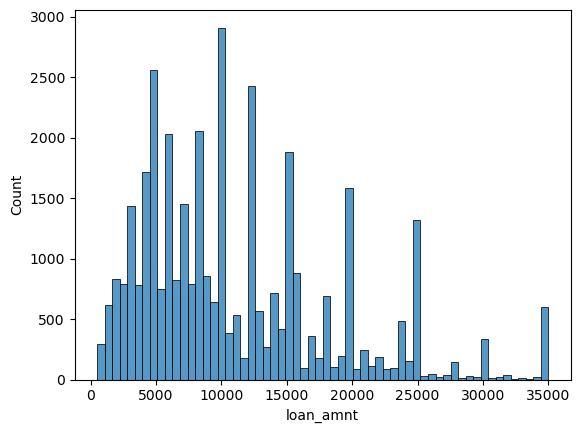

In [234]:
sns.histplot(x=df2['loan_amnt'])
plt.show()

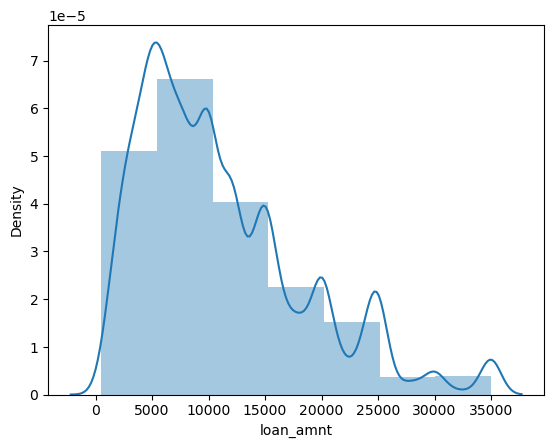

In [242]:
sns.distplot(df2['loan_amnt'],bins=7)
plt.show()
#Most of the loan amounts are between 5000-10000